<a href="https://colab.research.google.com/github/camdenlol/Data_Viz/blob/main/nonyellownsnow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## data cleaned

cleaned data. added month column and removed question marks from time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/camdenlol/SnOasis/main/snoasisData.csv')

In [4]:
df.Time.loc[0][:-3]+" "+df.Time.loc[0][-2:]


'7:50:56 PM'

In [5]:
def getRidOfQuestion(string):
  return string[:-3]+" " +string[-2:]


In [6]:
 df.Time = df.Time.apply(getRidOfQuestion)

In [7]:
df.Date=pd.to_datetime(df.Date, format = '%m/%d/%Y')

In [8]:
df["MonthName"] = df.Date.dt.month_name()

In [20]:
df['Time'] = pd.to_datetime(df['Time'])

# Convert AM/PM time to 24-hour format
#df['Time'] = df['Time'].dt.strftime('%H:%M:%S')


In [27]:
df

,Date,Time,Staff,Receipt number,Name,Variant,Unit,Quantity,Price (USD),Discount (USD),...,Tax Info Available,Is Tax Exempt,Total tax collected (USD),Final price (USD),SKU,Barcode,Cost price,Comment,MonthName,hour
0,2023-02-28,2024-02-21 19:50:56,SnOasis Main,1,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,February,19
1,2023-02-28,2024-02-21 19:52:12,SnOasis Main,2,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,February,19
2,2023-02-28,2024-02-21 19:58:14,SnOasis Main,3,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,February,19
3,2023-02-28,2024-02-21 20:21:15,SnOasis Main,4,Candy Bar,NaN,NaN,1,1.5,0.0,...,Yes,No,0.14,1.64,NaN,NaN,0.0,NaN,February,20
4,2023-02-28,2024-02-21 21:29:15,SnOasis East,5,Gift card,NaN,NaN,1,1.0,0.0,...,No,No,0.00,1.00,NaN,NaN,0.0,NaN,February,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76214,2023-11-05,2024-02-21 17:42:06,SnOasis Main,37192,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,November,17
76215,2023-11-05,2024-02-21 17:44:05,SnOasis Main,37193,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,November,17
76216,2023-11-05,2024-02-21 17:48:20,SnOasis Main,37194,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,November,17
76217,2023-11-05,2024-02-21 17:51:32,SnOasis Main,37195,Small,NaN,NaN,2,2.0,0.0,...,Yes,No,0.19,2.19,NaN,NaN,0.0,NaN,November,17


In [26]:
df["hour"]=df.Time.dt.hour

In [38]:
dfg = df.groupby("hour").sum().Quantity

<ipython-input-38-8bba9651fad2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby("hour").sum().Quantity


<Axes: xlabel='hour'>

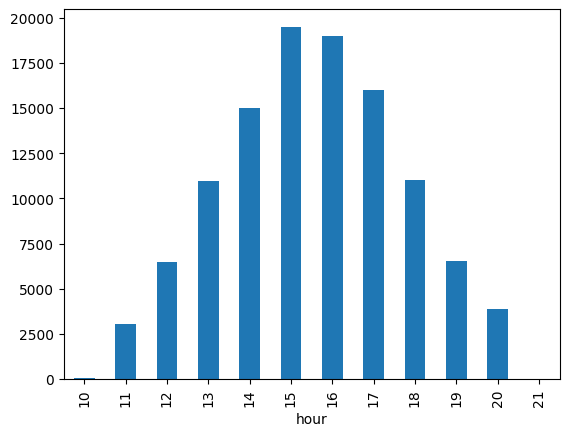

In [40]:
dfg.plot.bar()